# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

silhouette_avg

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5398971441034115

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

silhouette_avg

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5222431198982168

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

silhouette_avg

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [6]:
from yellowbrick.cluster import KElbowVisualizer


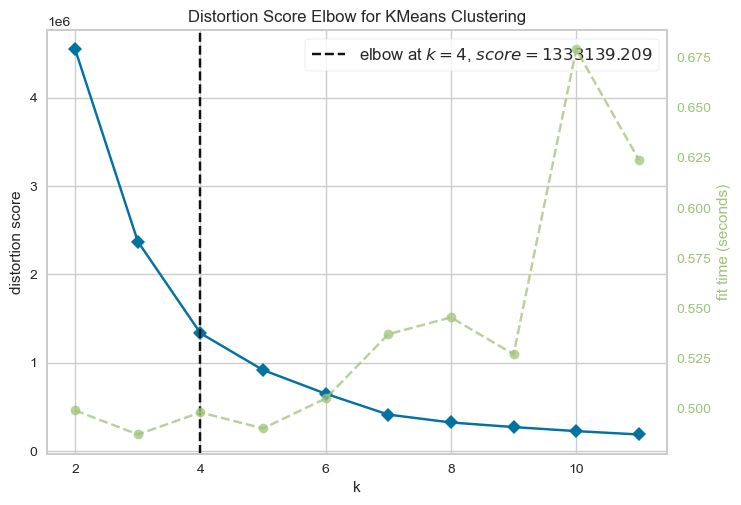

In [9]:
model = KMeans()

visualizer_distortion = KElbowVisualizer(model, k=(2, 12), metric='distortion')
visualizer_distortion.fit(X)
visualizer_distortion.show();

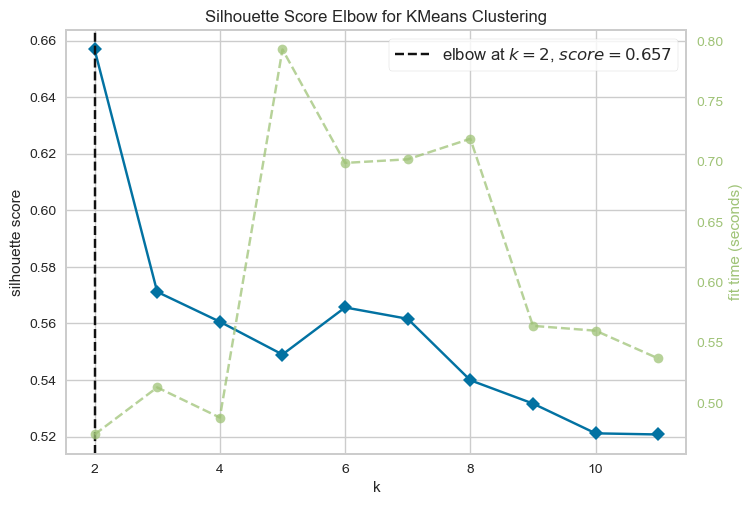

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
visualizer_silhouette = KElbowVisualizer(model, k=(2, 12), metric='silhouette')
visualizer_silhouette.fit(X)
visualizer_silhouette.show()

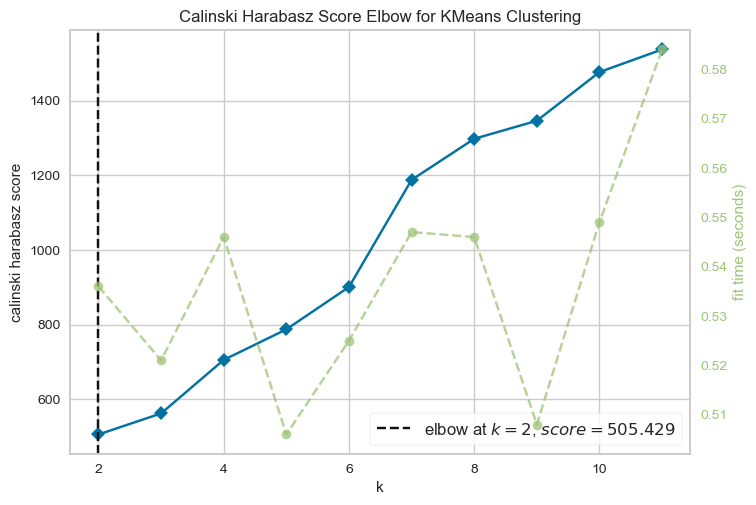

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
visualizer_calinski_harabaz = KElbowVisualizer(model, k=(2, 12), metric='calinski_harabasz')
visualizer_calinski_harabaz.fit(X)
visualizer_calinski_harabaz.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [12]:
from sklearn.cluster import AgglomerativeClustering

model_agg = AgglomerativeClustering()

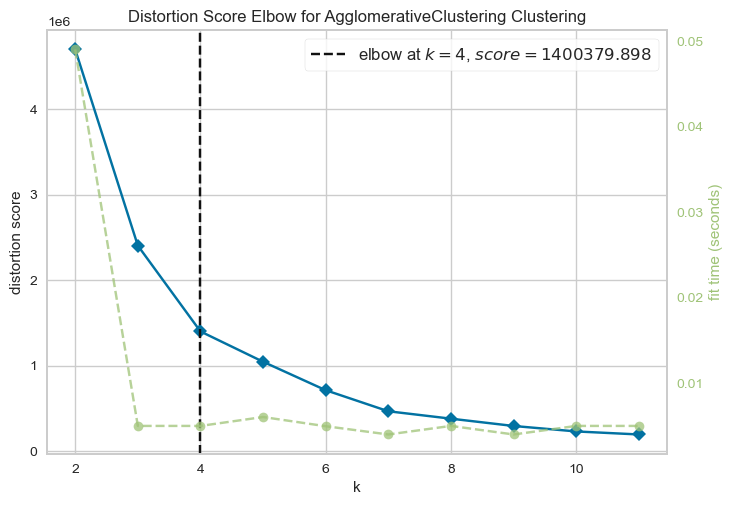

In [13]:
visualizer_distortion = KElbowVisualizer(model_agg, k=(2, 12), metric='distortion')
visualizer_distortion.fit(X)
visualizer_distortion.show();

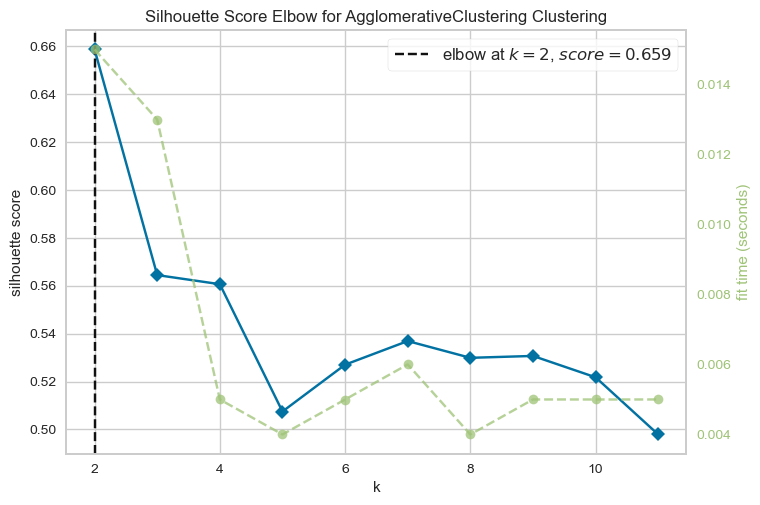

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
visualizer_silhouette = KElbowVisualizer(model_agg, k=(2, 12), metric='silhouette')
visualizer_silhouette.fit(X)
visualizer_silhouette.show()

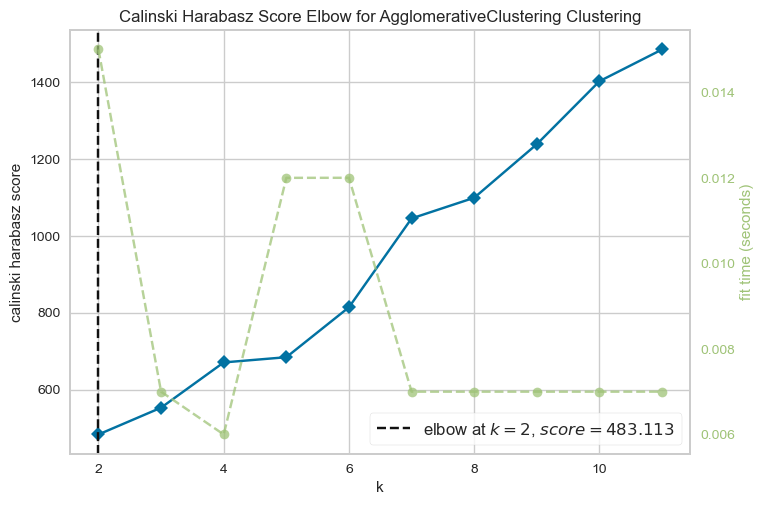

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
visualizer_calinski_harabaz = KElbowVisualizer(model_agg, k=(2, 12), metric='calinski_harabasz')
visualizer_calinski_harabaz.fit(X)
visualizer_calinski_harabaz.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

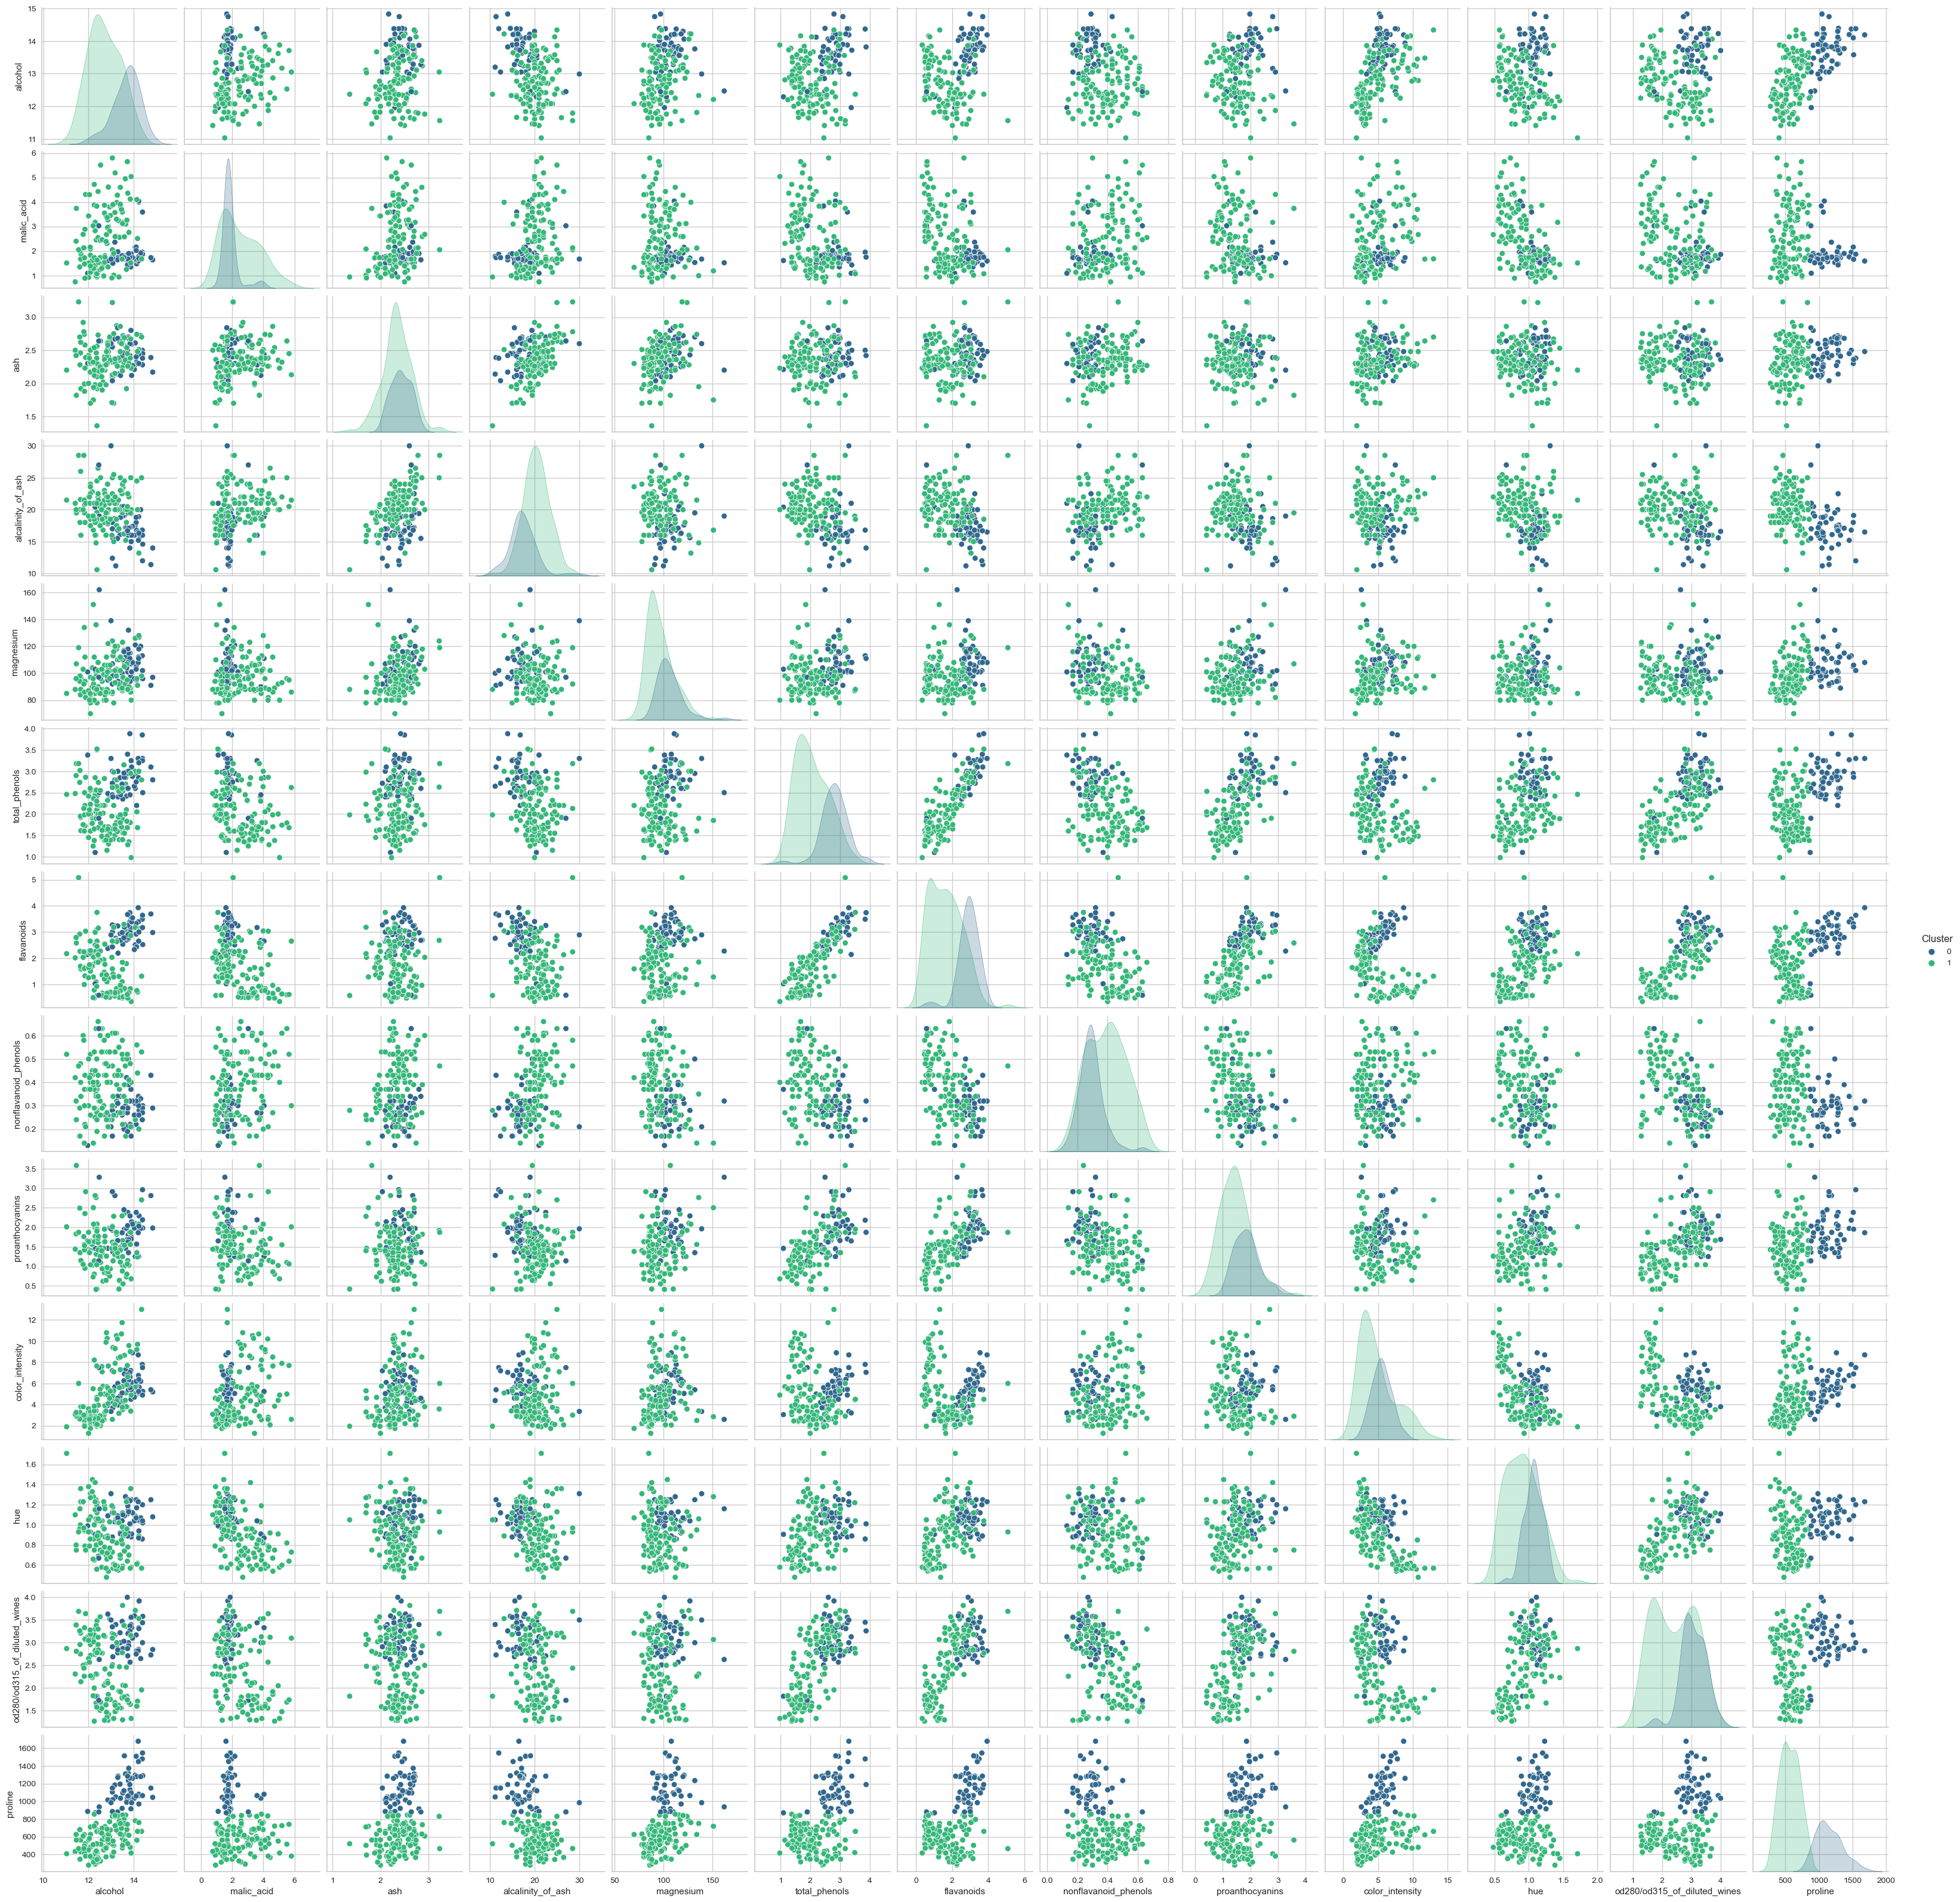

In [20]:
kmeans_best = KMeans(n_clusters=2)

kmeans_best.fit(X)

cluster_labels = kmeans_best.labels_
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = cluster_labels

sns.pairplot(X_with_clusters, hue='Cluster', palette='viridis');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [21]:
from sklearn.decomposition import PCA

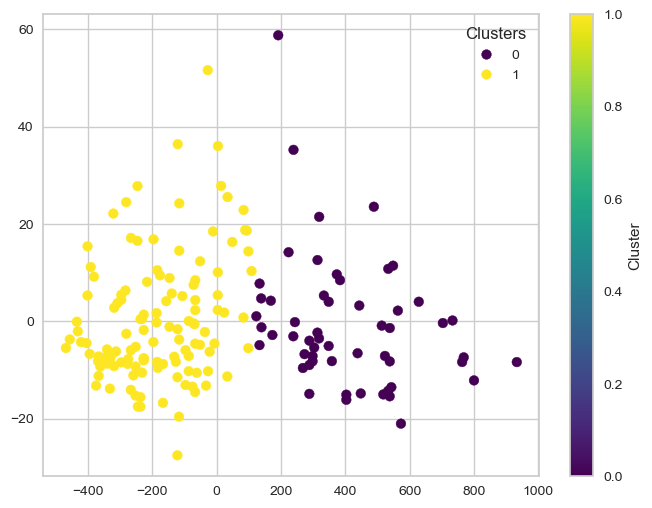

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.colorbar(label='Cluster');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [25]:
from sklearn.manifold import TSNE

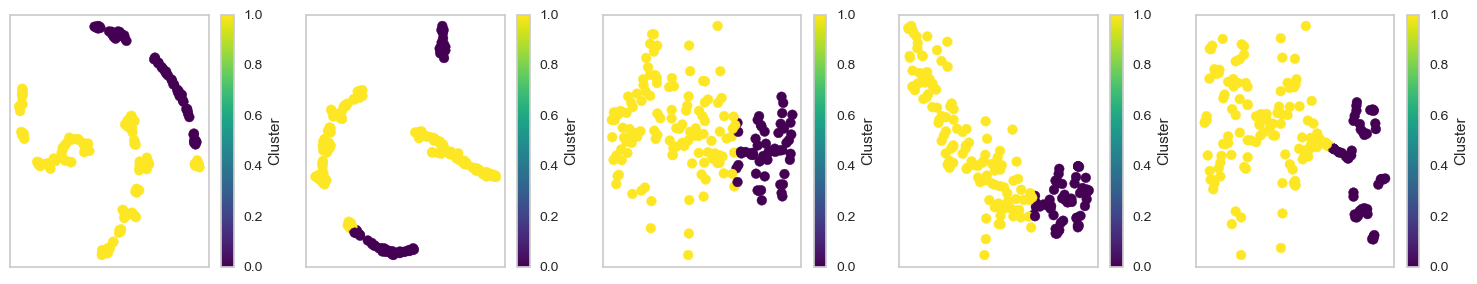

In [27]:
perplexities = [5, 10, 20, 30, 50]

plt.figure(figsize=(15, 3))
for i, perplexity in enumerate(perplexities):

    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)
    
    plt.subplot(1, len(perplexities), i + 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(scatter, label='Cluster')

plt.tight_layout();